In [1]:
import pandas as pd
#import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from random import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [2]:
MalwareDataset = pd.read_csv("Malware_dataset.csv") 

In [3]:
print(MalwareDataset.shape)

(100000, 35)


In [4]:
MalwareDataset.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [5]:
from sklearn.utils import shuffle
MalwareDataset = shuffle(MalwareDataset)
MalwareDataset.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
61625,com.magmamobile.game.Words.apk,625,benign,466944,0,3070062592,15450,0,0,0,...,21,1,120,0,3204448256,378774,4,0,0,0
1201,com.kmcpesh.medicalskillsproceduresfree.apk,201,benign,0,0,3069403136,16447,0,0,0,...,0,1,120,0,3204448256,390324,5,0,0,0
62113,1117d14765e9169184cc931f7a417a460898e4b0d8f3c8...,113,malware,0,0,3069956096,13996,0,0,0,...,0,1,120,0,3204448256,374050,4,0,0,0
35917,024b27972a6b3a1535510e9c0f154fb1a8e3a2afb25d5c...,917,malware,0,0,3070222336,14019,0,0,0,...,0,0,120,0,3204448256,371799,3,0,0,0
77592,3d51872172186d55238444384224ca46d0f1a7ab879104...,592,malware,8192,0,3069304832,22681,0,0,0,...,20,2,114,1,3204448256,393558,4,0,0,0


In [6]:
malware=print(MalwareDataset.columns)

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')


In [7]:
data=MalwareDataset.drop(["classification","hash"], axis=1)
#data=MalwareDataset

In [8]:
print(data.shape)

(100000, 33)


In [9]:
print(data.columns)

Index(['millisecond', 'state', 'usage_counter', 'prio', 'static_prio',
       'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count', 'task_size',
       'cached_hole_size', 'free_area_cache', 'mm_users', 'map_count',
       'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm',
       'nr_ptes', 'end_data', 'last_interval', 'nvcsw', 'nivcsw', 'min_flt',
       'maj_flt', 'fs_excl_counter', 'lock', 'utime', 'stime', 'gtime',
       'cgtime', 'signal_nvcsw'],
      dtype='object')


In [10]:
target=MalwareDataset.drop(['hash', 'millisecond', 'state', 'usage_counter', 'prio', 'static_prio',
       'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count', 'task_size',
       'cached_hole_size', 'free_area_cache', 'mm_users', 'map_count',
       'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm',
       'nr_ptes', 'end_data', 'last_interval', 'nvcsw', 'nivcsw', 'min_flt',
       'maj_flt', 'fs_excl_counter', 'lock', 'utime', 'stime', 'gtime',
       'cgtime', 'signal_nvcsw'], axis=1)

In [11]:
print(target.shape)
print(target.columns)

(100000, 1)
Index(['classification'], dtype='object')


In [12]:
target=target.classification.map({'benign':0, 'malware':1})

In [13]:
target[:10]

61625    0
1201     0
62113    1
35917    1
77592    1
95453    1
75833    1
37662    0
46395    1
35042    1
Name: classification, dtype: int64

In [14]:
import numpy as np
data=np.array(data)
target=np.array(target)

In [15]:
from sklearn import preprocessing
data = preprocessing.scale(data)
#target = preprocessing.scale(target)

C:\Users\Dilhara\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [16]:
data[:100]

array([[ 0.43474497,  0.33025664,  0.        , ..., -0.50916578,
         0.        ,  0.        ],
       [-1.03403485, -0.16852568,  0.        , ..., -0.50916578,
         0.        ,  0.        ],
       [-1.33887594, -0.16852568,  0.        , ..., -0.50916578,
         0.        ,  0.        ],
       ...,
       [-0.54213217,  0.82903896,  0.        , ..., -0.20270156,
         0.        ,  0.        ],
       [-1.11024512, -0.16852568,  0.        , ..., -0.50916578,
         0.        ,  0.        ],
       [ 0.35160649, -0.1641504 ,  0.        , ..., -0.50916578,
         0.        ,  0.        ]])

In [17]:
data= data.reshape(data.shape[0],data.shape[1],1)
print(data.shape)

(100000, 33, 1)


In [18]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv1D,MaxPooling1D
from keras.layers import Dropout

model=Sequential()
model.add(Conv1D(filters=128,kernel_size=3,input_shape=train_data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=8,data_format='channels_first'))

model.add(Conv1D(filters=64,kernel_size=5))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=8,data_format='channels_first'))


model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(1,activation='linear')) #Regression Linear activation

model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])




Using TensorFlow backend.


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 31, 128)           512       
_________________________________________________________________
activation_1 (Activation)    (None, 31, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 31, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 27, 64)            5184      
_________________________________________________________________
activation_2 (Activation)    (None, 27, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 8)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 8)            

In [21]:
history=model.fit(train_data,train_target,epochs=7,validation_split=0.2)

Train on 72000 samples, validate on 18000 samples
Epoch 1/7
72000/72000 [==============================] - 25s 351us/step - loss: 0.0720 - accuracy: 0.9275 - val_loss: 0.0213 - val_accuracy: 0.9927
Epoch 2/7
72000/72000 [==============================] - 35s 487us/step - loss: 0.0357 - accuracy: 0.9835 - val_loss: 0.0161 - val_accuracy: 0.9941
Epoch 3/7
72000/72000 [==============================] - 35s 487us/step - loss: 0.0301 - accuracy: 0.9895 - val_loss: 0.0134 - val_accuracy: 0.9965
Epoch 4/7
72000/72000 [==============================] - 38s 532us/step - loss: 0.0272 - accuracy: 0.9922 - val_loss: 0.0123 - val_accuracy: 0.9972
Epoch 5/7
72000/72000 [==============================] - 37s 517us/step - loss: 0.0254 - accuracy: 0.9935 - val_loss: 0.0090 - val_accuracy: 0.9968
Epoch 6/7
72000/72000 [==============================] - 36s 507us/step - loss: 0.0236 - accuracy: 0.9949 - val_loss: 0.0092 - val_accuracy: 0.9984
Epoch 7/7
72000/72000 [==============================] - 36s 5

In [22]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')

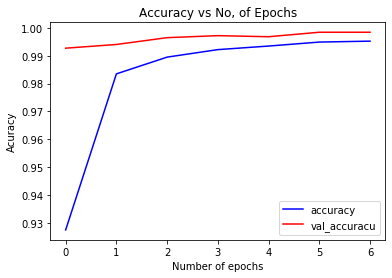

In [23]:
plt.plot(history.history['accuracy'],'b',label="accuracy")
plt.plot(history.history['val_accuracy'],'r',label="val_accuracu")
plt.xlabel('Number of epochs')
plt.ylabel('Acuracy')
plt.title('Accuracy vs No, of Epochs')
plt.legend()


In [24]:
#Testing the model
Result=model.predict(test_data)

In [25]:
from sklearn.metrics import r2_score
r2=r2_score(test_target,Result)
print('R2_score:',r2)

R2_score: 0.9655935502491162


In [28]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(test_target, Result)

print('Average precision-recall score: {0:0.8f}'.format(average_precision))

Average precision-recall score: 0.99997155


In [29]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(test_target, Result.round())
print("False positive rate : %f %%" % ((CM[0][1] / float(sum(CM[0])))*100))
print('False negative rate : %f %%' % ( (CM[1][0] /float(sum(CM[1]))*100)))

False positive rate : 0.283000 %
False negative rate : 0.376014 %


In [31]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_target,Result.round())

print("Accuracy:",accuracy)

Accuracy: 0.9967
